In [1]:
# #akyork
# #written to analyze the 16 HMO glycans provided by Ben
# import sys

# from glypy.io import glycoct, iupac
# import extract_motif 
# import customize_motif_vec 
# import glycan_io
# import pandas as pd
# import numpy as np
# import plot_glycan_utilities
# import seaborn as sns
# import motif_class
# from importlib import reload
# import clustering_analysis_pip
# import matplotlib.pyplot as plt
# import ndex 
# from ndex.networkn import NdexGraph
# import networkx as nx
# import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline

In [2]:
%matplotlib inline

In [3]:
import os
# from glycompare import *
import sys
import pandas as pd
from importlib import reload
# sys.path.insert(0, '/Users/apple/PycharmProjects/GlyCompare/')
from glycompare import *
import glypy
reload(pipeline_functions)


Thanks for using the GlyCompare v1.0, 
Please check our github for the latest update.


Bokan & Ben,
08/1/2019




<module 'glycompare.pipeline_functions' from '/anaconda3/lib/python3.7/site-packages/glycompare/pipeline_functions.py'>

In [4]:
# root_addr = '/Users/apple/PycharmProjects/GlyCompare/Figure/Data/HMO/'
# root_addr = '/Users/apple/PycharmProjects/GlyCompare/Figure/Data/HMO/'

# load_para_keywords

In [5]:
glycompare_addr = '/Users/apple/PycharmProjects/GlyCompare/'
glytoucan_db_addr = os.path.join(glycompare_addr, 'glycompare','database', 'glytoucan_database.json')
# __init__.num_processors = 4
# __init__.exact_Ture = False
linkage_specific = True
num_processors = 8
# project parameter
working_addr = '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/'
project_name = "paper_hmo"
costumized_glycan_identifier = True
external_profile_naming= True

reload(pipeline_functions)
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, glyglytoucan_db_addr=glytoucan_db_addr)
keywords_dict

{'project_name': 'paper_hmo',
 'working_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/',
 'glycoct_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/source_data/glycoct/',
 'source_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/source_data/',
 'output_data_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/output_data/',
 'plot_output_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/output_plot/',
 'glycan_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/output_data/paper_hmo_glycan_glycoct_dict.json',
 'glycan_substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/output_data/paper_hmo_glycan_substructure_glycoct_dict.json',
 'substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/output_data/paper_hmo_substructure_glycoct_dict.json',
 'substructure_glycoct_vec_

In [6]:
pipeline_functions.check_init_dir(keywords_dict)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory


# load and extract motifs from local dir

In [7]:

data_type = 'local_glycoct'
reload(pipeline_functions)
from glycompare import glycan_io
reload(glycan_io)
glycan_dict = pipeline_functions.load_glycans_pip(keywords_dict=keywords_dict,
                                           data_type=data_type)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory
end loading glycoct from  /Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/source_data/glycoct/
Saved /Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/output_data/paper_hmo_glycan_glycoct_dict.json for future use. You can use "used" in the datatype next time


In [8]:
matched_dict = pipeline_functions.extract_and_merge_substrutures_pip(keywords_dict, num_processors=num_processors,linkage_specific=linkage_specific, forced=True)

start glycan_dict
start parallel parsing 16 glycans
start LNT
start LSTb
start LSTc
start 2'FL
start LNFP III
start LNFP I
start FDSLNH
start LNFP II
2'FL 3 0.012082815170288086
start LNnT
LNT 4 0.025244712829589844
start 3FL
LNnT 4 0.29109883308410645
start DFLNT
3FL 3 0.01105809211730957
LNFP II 5 0.5198678970336914
LNFP III 5 0.5318820476531982
LNFP I 5 0.5355989933013916
start DSLNH
DFLNT 6 0.2121570110321045
start DFLNH
LSTc 5 0.5627717971801758
start 3'SL
start FLNH
start DSLNT
3'SL 3 0.011715173721313477
LSTb 5 0.5704507827758789
DSLNT 6 0.0763547420501709
FLNH 7 0.15780925750732422
DFLNH 8 0.3959848880767822
DSLNH 8 0.43724703788757324
FDSLNH 9 1.1765601634979248
finished pool
glycan_dict 16
finished merging all substructures into substructure_dic
start merge substructure_dict
Start merge_glycan_substructure_to_substructure_dict
combine original
substructure_dict is merged with len  410
finished removing duplicate
after the cleaning the substructure vec's length is 144
1 5
2 12

In [9]:
chra_to_id = {}
# for j in range(16):
#     _a = j+1
#     chra_to_id[_a]={}
for i in glycan_dict.keys():
    chra_to_id[i]=i
json_utility.store_json('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/source_data/glycan_identifier_to_structure_id.json', chra_to_id)

# preparing the glycan_table and motif_table

In [10]:
glycan_abd_table = pd.read_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/source_data/abundance_table.csv', index_col=0)
glycan_abd_table = glycan_abd_table.transpose()
glycan_abd_table = glycan_abd_table.drop(columns=41)
reload(pipeline_functions)
from glycompare import process_glycoprofiles
reload(process_glycoprofiles)
_, glycoprofile_list = pipeline_functions.glycoprofile_pip(keywords_dict, glycan_abd_table, unique_glycan_identifier_to_structure_id=True, already_glytoucan_id=False, external_profile_naming=True, forced=True)

abd_list 16 profile_list 47
16 47
duplicating naming


the glycan core is
start substructure_with core
len 1
len 2
len 3
len 4
len 5
len 6
len 7
len 8
len 9
Finish the n-glycan match  67  substructures are matched to the n-glycan core
start building dependence_tree
1
2
3
4
5
6
7
8
9
Start dropping nodes with weight zero, nodes count: 67
Nodes left []
67 132
_a.nodes 67
_a.nodes 67
merged_weights_dict 67
After first drop 46 + 21 =  67 67.0
mod_nodes 21
mod_edges 16
after selection, the nodes preserved:  [5, 18, 32, 34, 35, 37, 40, 61, 62, 63, 64, 65, 66, 94, 106, 113, 120, 127, 141, 142, 143]
after selection, the edges preserved:  [(5, 18), (5, 32), (5, 34), (5, 35), (18, 37), (18, 40), (37, 61), (37, 63), (40, 62), (40, 64), (40, 65), (62, 106), (64, 113), (66, 94), (94, 120), (127, 142)]
Removed core, the index is 0


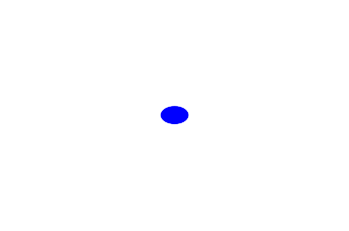

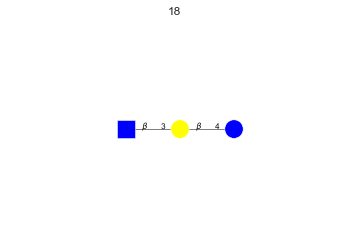

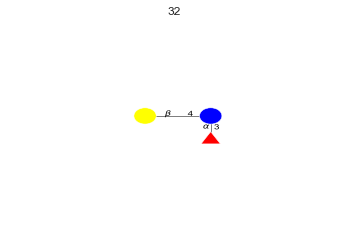

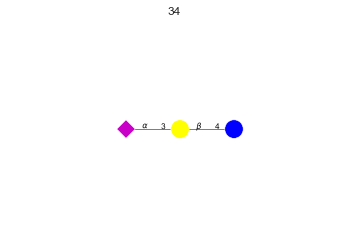

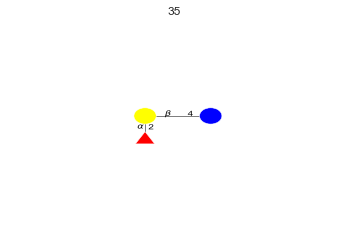

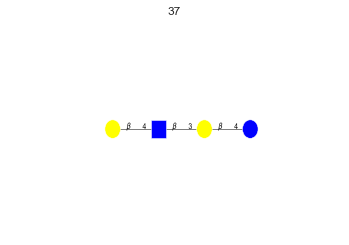

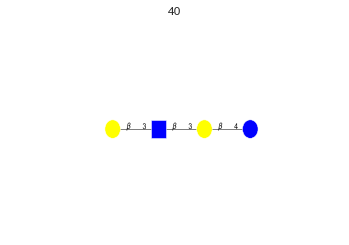

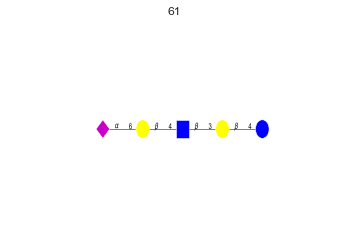

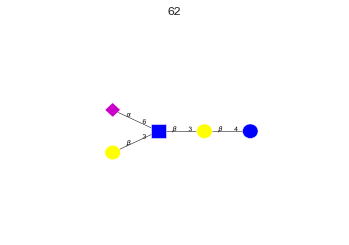

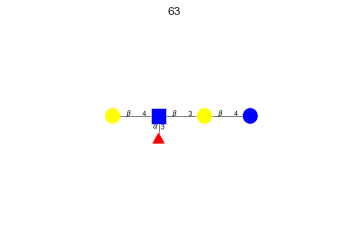

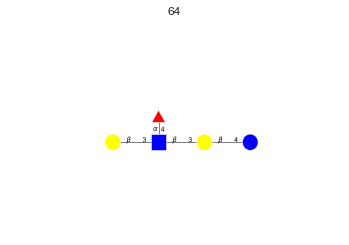

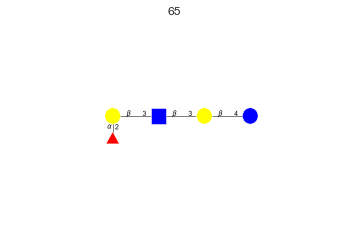

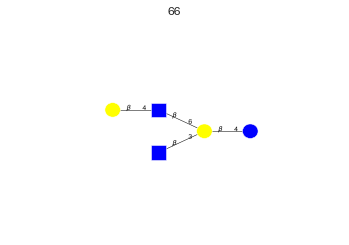

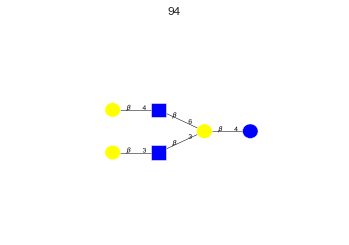

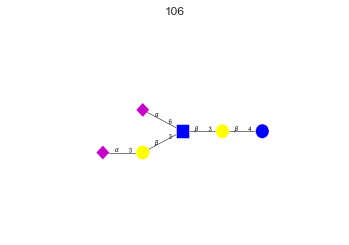

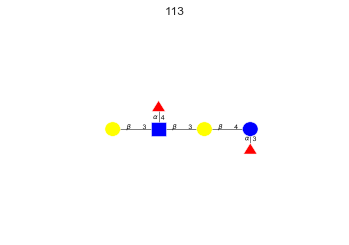

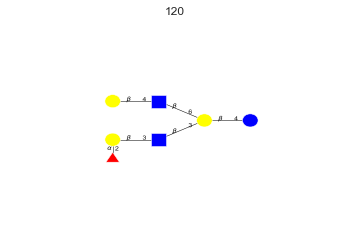

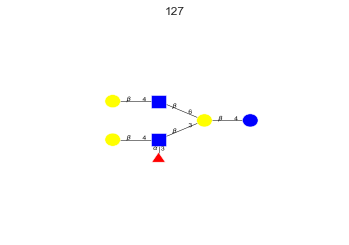

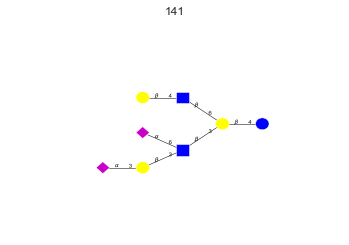

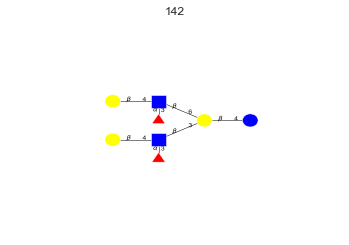

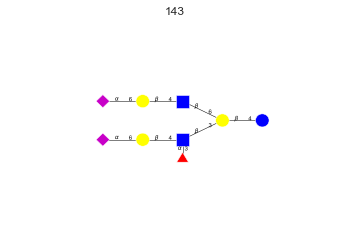

In [11]:
reload(pipeline_functions)
from glycompare import select_motifs
from glypy.io import glycoct
reload(select_motifs)
core=glycoct.loads(
"""
RES
1b:b-dglc-HEX-1:5
LIN""")
motif_abd_table, motif_lab, merged_weights_dict=pipeline_functions.select_motifs_pip(keywords_dict, 
                                                     linkage_specific=linkage_specific,     
                                                     only_substructures_start_from_root=True,
                                                     core=core,
                                                     drop_parellel=False,
                                                     drop_diff_abund=False,
                                                     select_col= [])
# we also remove the (glactose - glucose) because they are all same abundance
motif_abd_table = motif_abd_table.drop(index=5)
motif_abd_table_addr = keywords_dict['motif_abd_table_addr']
motif_abd_table.to_csv(motif_abd_table_addr)
reload(plot_glycan_utilities)
for i in motif_abd_table.index:
    plot_glycan_utilities.plot_glycan(motif_lab.substructure_vec[i], title=i, label=True)
# plot_glycan_utilities.plot_glycan_list([motif_lab.motif_vec[i] for i in motif_abd_table.index], motif_abd_table.index.tolist(), label=True)

# Plotting glycan clustering table, similar as S7 b

<Figure size 432x288 with 0 Axes>

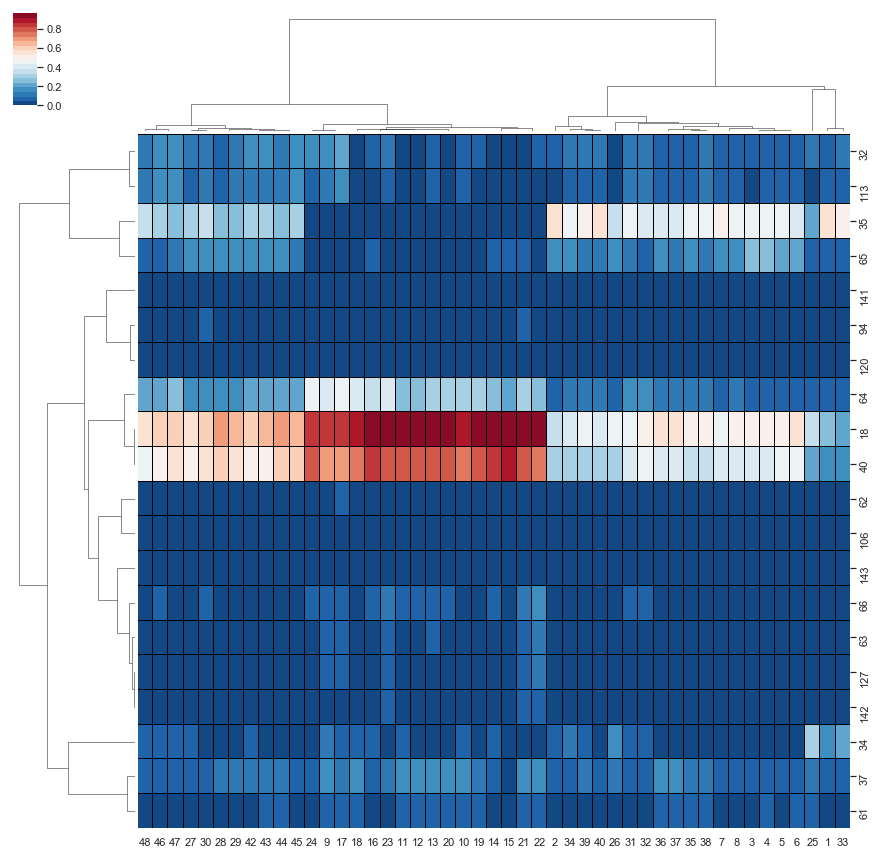

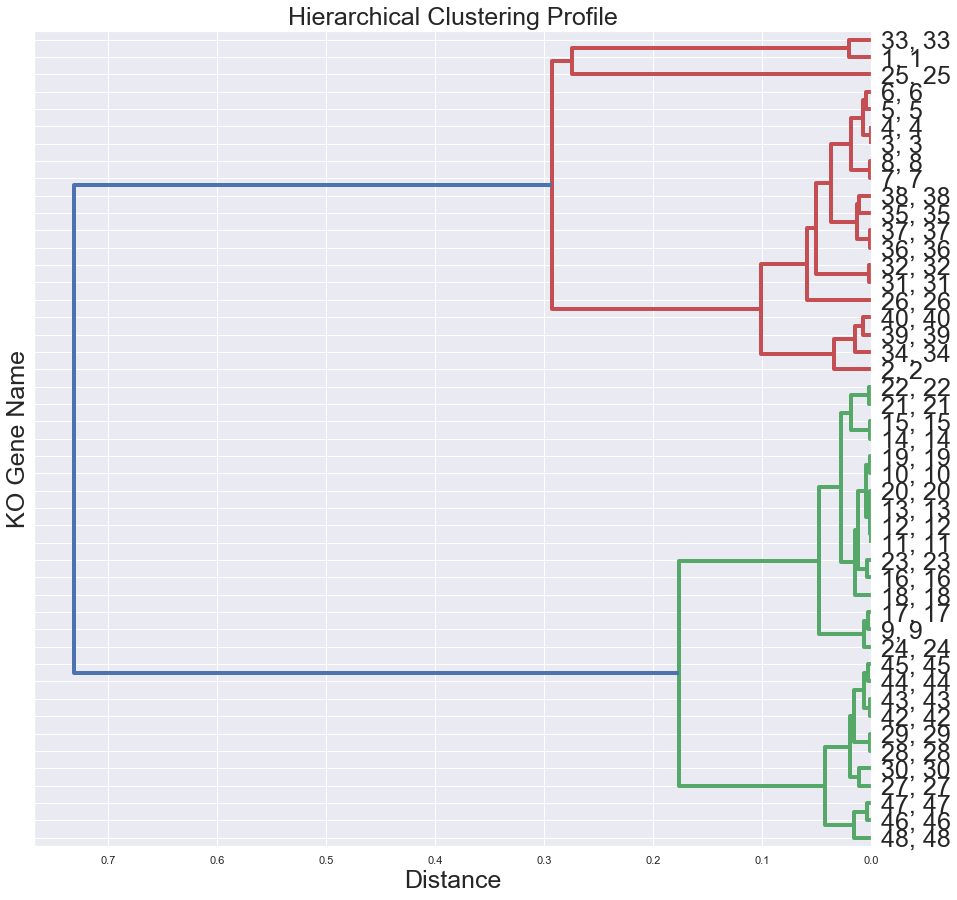

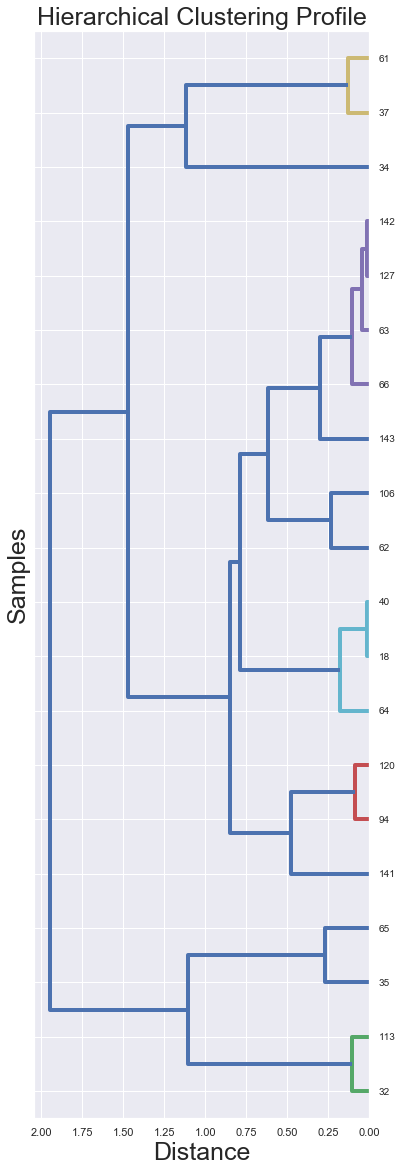

In [12]:
# selected_name_list = json_utility.load_json(keywords_dict['external_profile_naming_addr'])
reload(pipeline_functions)
glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict=keywords_dict, 
                                           motif_abd_table=motif_abd_table, 
                                           select_profile_name = [])
# motif_abd_table.columns

# Plotting glycan clustering table, similar as S7 a

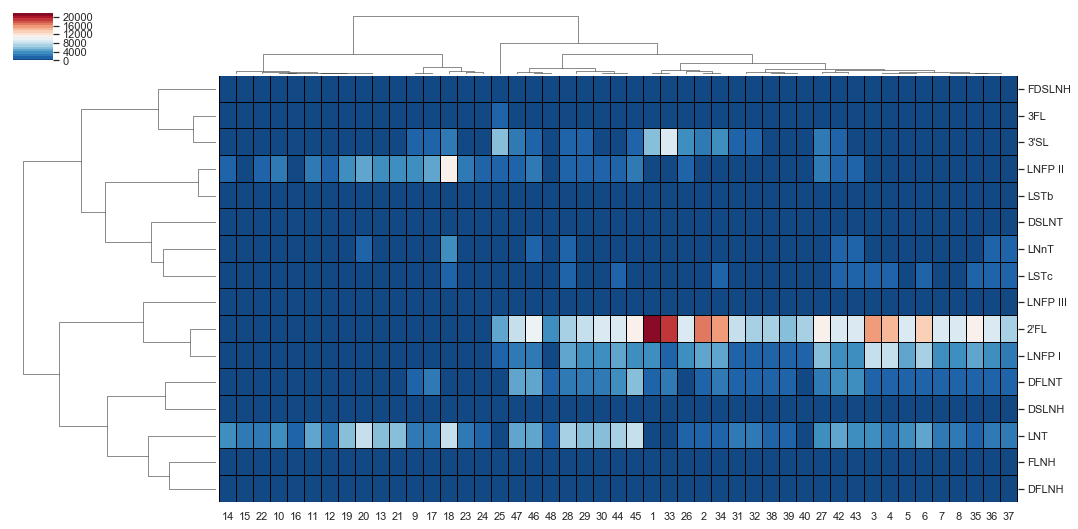

In [13]:

import seaborn as sns
g = sns.clustermap(glycan_abd_table, metric="correlation", cmap=sns.color_palette("RdBu_r", 20), linewidths=.01,figsize=(18,9),linecolor='black',method='complete', )
